In [179]:
from sympy import *
from sympy.solvers.ode.systems import linodesolve

# tau_s = 0.1 #N*m
# omega_f = 1000 #about 10,000rpm

tau_max, omega_max = symbols("tau_max, omega_max") #stall torque, free speed
# free_speed = 1000 #about 10,000rpm


T1, T2, k, m_a, m_l, k = symbols('T1, T2, k, m_a, m_l, k')
c0, c1, c2, c3, c4, c5, c6 = symbols('c:7')

t = symbols('t')

c1 = -k * T1**2 * omega_max / tau_max
c2 = k * T1 * omega_max / (tau_max * T2)
c3 = k * T1 / (T2 * m_l)
c4 = -k / (T2**2 * m_l)


A = Matrix([
    [c1, c2, 0],
    [0, 0, 1],
    [c3, c4, 0],
])

A

Matrix([
[-T1**2*k*omega_max/tau_max, T1*k*omega_max/(T2*tau_max), 0],
[                         0,                           0, 1],
[             T1*k/(T2*m_l),              -k/(T2**2*m_l), 0]])

In [71]:
b = Matrix([1, 0, 0])
linsol = linodesolve(A, t, b=b)
simplify(linsol[0])

(T1**2*T2**2*m_l*omega_max*(-_Dummy_10272*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) - _Dummy_10273*exp(t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) - T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(t*(-T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True))*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)) + T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(-t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_

In [80]:
for row in linsol:
    simprow = simplify(row)
    print(count_ops(simprow))
    display(simprow)

275


(T1**2*T2**2*m_l*omega_max*(-_Dummy_10272*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) - _Dummy_10273*exp(t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) - T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(t*(-T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True))*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)) + T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(-t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_

333


(2*T2*m_l*tau_max*(_Dummy_10272 + T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(t*(-T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True))/sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) + 2*T2*m_l*tau_max*(_Dummy_10273 - T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(-t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True))/sqrt(m_l

239


(_Dummy_10272*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)) + _Dummy_10273*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))*exp(t*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(T2*m_l*tau_max)) + T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(-T1**2*omega_max*t/(2*tau_max) + t*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max - sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True)) - T1*tau_max*Piecewise((-2*T2*m_l*tau_max*exp(-T1**2*omega_max*t/(2*tau_max) - t*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max))/(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2)), Ne(T1**2*T2*m_l*omega_max + sqrt(T1**4*T2**2*m_l**2*omega_max**2 + 4*m_l*tau_max**2), 0)), (t, True))*exp(t*sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(T2*m_l*tau_max)))*exp(t*(T1*

In [188]:
xsol = simplify((A*t).exp())
print(count_ops(xsol))
xsol

1719


Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  (T1**2*T2*omega_max*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))*exp(t*(T1**2*T2*k*m_l*omega_max - sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))/(2*T2*m_l*tau_max)) - T1**2*T2*omega_max*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))*exp(t*(T1**2*T2*k*m_l*omega_max + sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))/(2*T2*m_l*tau_max)) + (T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)*exp(T1**2*k*omega_m

In [185]:
from sympy.solvers.ode.systems import matrix_exp
matexp = simplify(matrix_exp(A,t))
print(count_ops(matexp))
matexp

1719


Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  (T1**2*T2*omega_max*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))*exp(t*(T1**2*T2*k*m_l*omega_max - sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))/(2*T2*m_l*tau_max)) - T1**2*T2*omega_max*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))*exp(t*(T1**2*T2*k*m_l*omega_max + sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))/(2*T2*m_l*tau_max)) + (T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)*exp(T1**2*k*omega_m

Matrix([
[                                                                                                                                                                                                                                                       -25.059467290543*(-0.039905078125*exp(5.625*t) + 0.000355333872934854*sqrt(30)*I*exp(16.6666666666667*t*(0.16875 - 0.631704662995296*sqrt(30)*I)) - 0.000355333872934854*sqrt(30)*I*exp(16.6666666666667*t*(0.16875 + 0.631704662995296*sqrt(30)*I)))*exp(-5.625*t),                                                                                                                           -11.8726367547106*sqrt(30)*I*(exp(21.0568220998432*sqrt(30)*I*t) - 1)*exp(-5.0*t*(0.5625 + 2.10568220998432*sqrt(30)*I)),                                                                                                                                                                                                                                               

TypeError: Cannot convert complex to float

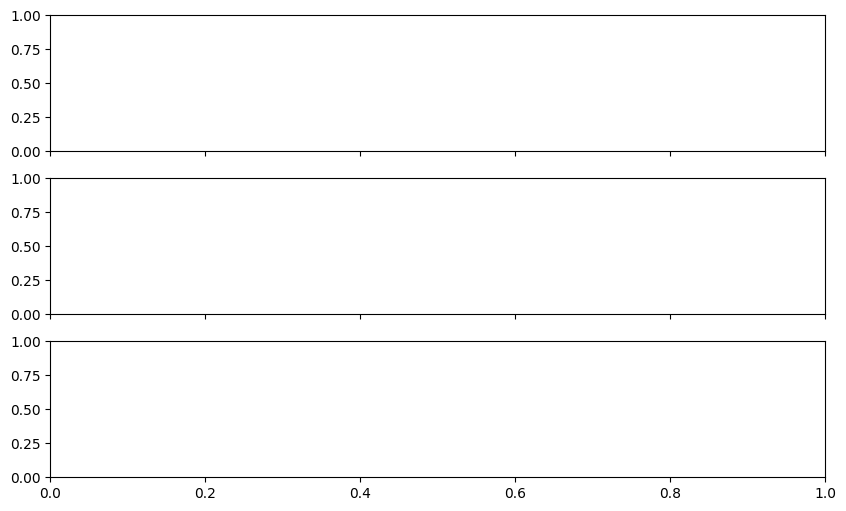

In [195]:
import numpy as np
import matplotlib.pyplot as plt

nums = {
    T1: 0.00025, #0.035 m / 140 rad from TSA test
    T2: 3, #guess for leg movement/string contract
    m_a: 1/2 * 0.020 * 0.010**2, #cylinder MOI 20g 10mm radius
    m_l: 0.1, #mass to push off ground
    k: 3000, # no idea honestly
    tau_max: 0.1, #N*m stall torque
    omega_max: 3000, #about 10,000rpm free speed
}

xoft = xsol.subs(nums)
display(xoft)

X = Matrix([0, 0.1, 0])

ts = np.linspace(0, 10, 10)
Xs = []

for ti in ts:
    Xs.append(xoft.subs(t,ti) @ X)


Xs = np.array(Xs).reshape((-1,3)).T
# print(np.real(Xs))

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,6))

axs[0].plot(ts, Xs[0], label='xa')
axs[1].plot(ts, Xs[1], label='xl')
axs[2].plot(ts, Xs[2], label='xldot')

for i in range(len(axs)):
    axs[i].legend()

plt.show()

In [196]:
from sympy.solvers.ode.systems import dsolve_system

tau_max, omega_max = symbols("tau_max, omega_max") #stall torque, free speed

T1, T2, k, m_a, m_l = symbols('T1, T2, k, m_a, m_l')
c0, c1, c2, c3, c4, c5, c6 = symbols('c:7')

x_a, x_l = symbols("x_a x_l", cls=Function)
t = symbols('t')

c1 = -k * T1**2 * omega_max / tau_max
c2 = k * T1 * omega_max / (tau_max * T2)
c3 = k * T1 / (T2 * m_l)
c4 = -k / (T2**2 * m_l)

eqs = [
    Eq(x_a(t).diff(t), c1*x_a(t) + c2*x_l(t) + omega_max), 
    Eq(x_l(t).diff(t).diff(t), c3*x_a(t) + c4*x_l(t))
]
display(eqs[0], eqs[1])

# sol = dsolve_system(eqs)
sol = dsolve_system(eqs, ics={x_a(0):0, x_l(0):0, x_l(t).diff(t).subs(t,0):0})
sol

Eq(Derivative(x_a(t), t), -T1**2*k*omega_max*x_a(t)/tau_max + T1*k*omega_max*x_l(t)/(T2*tau_max) + omega_max)

Eq(Derivative(x_l(t), (t, 2)), T1*k*x_a(t)/(T2*m_l) - k*x_l(t)/(T2**2*m_l))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sympy/simplify/radsimp.py:1131: SymPyDeprecationWarning: 

Using non-Expr arguments in Mul is deprecated (in this case, one of
the arguments has type 'Tuple').

If you really did intend to use a multiplication or addition operation with
this object, use the * or + operator instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#non-expr-args-deprecated
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  return Mul(*numer, evaluate=not exact), Mul(*denom, evaluate=not exact)


[[Eq(x_a(t), -T1**2*T2*k*m_l*omega_max**2*(T1**8*T2**4*k**2*m_l**2*omega_max**4 + T1**6*T2**3*k*m_l*omega_max**3*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2 - 2*T1**2*T2*omega_max*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 2*tau_max**4)*exp(-t*(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2))/(2*T2*m_l*tau_max))*Integral(exp(T1**2*k*omega_max*t/(2*tau_max))*exp(t*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))/(2*T2*m_l*tau_max)), (t, 0))/(T1**10*T2**5*k**3*m_l**3*omega_max**5 + T1**8*T2**4*k**2*m_l**2*omega_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 6*T1**6*T2**3*k**2*m_l**2*omega_max**3*tau_max**2 - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 8*T1**2*T2*k*m_l*omega_max*tau_max**4 + 2*tau_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2))

In [197]:
x_a_eq = simplify(sol[0][0])
x_l_eq = simplify(sol[0][1])
display(x_a_eq, x_l_eq)

Eq(x_a(t), -T1**2*T2*k*m_l*omega_max**2*(T1**8*T2**4*k**2*m_l**2*omega_max**4 + T1**6*T2**3*k*m_l*omega_max**3*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2 - 2*T1**2*T2*omega_max*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 2*tau_max**4)*Piecewise((2*T2*m_l*tau_max/(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2)), Ne(k, 0)), (0, True))*exp(-t*(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2))/(2*T2*m_l*tau_max))/(T1**10*T2**5*k**3*m_l**3*omega_max**5 + T1**8*T2**4*k**2*m_l**2*omega_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 6*T1**6*T2**3*k**2*m_l**2*omega_max**3*tau_max**2 - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 8*T1**2*T2*k*m_l*omega_max*tau_max**4 + 2*tau_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)

Eq(x_l(t), -2*T1*T2*k*m_l*omega_max*tau_max**2*(T1**8*T2**4*k**2*m_l**2*omega_max**4 + T1**6*T2**3*k*m_l*omega_max**3*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2 - 2*T1**2*T2*omega_max*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 2*tau_max**4)*Piecewise((2*T2*m_l*tau_max/(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2)), Ne(k, 0)), (0, True))*exp(-t*(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2))/(2*T2*m_l*tau_max))/((T1**2*T2*k*m_l*omega_max + sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))*(T1**10*T2**5*k**3*m_l**3*omega_max**5 + T1**8*T2**4*k**2*m_l**2*omega_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 6*T1**6*T2**3*k**2*m_l**2*omega_max**3*tau_max**2 - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 8*T1**2*T2*k*m

In [199]:
from sympy.codegen.ast import CodeBlock, Assignment

x_l_expr = (x_l_eq.rhs)

x_lcode = symbols('x_lcode')
c = CodeBlock(Assignment(x_lcode, x_l_expr))
print(ccode(c.cse()))

x0 = T1*T2*omega_max;
x1 = pow(tau_max, 2);
x2 = 4*x1;
x3 = k*m_l;
x4 = pow(T1, 4)*pow(T2, 2)*pow(omega_max, 2);
x5 = -x2 + x3*x4;
x6 = sqrt(x3*x5);
x7 = pow(T1, 2)*omega_max;
x8 = T2*x7;
x9 = x6*x8;
x10 = x3*x8;
x11 = x10 + x6;
x12 = x2*x3;
x13 = pow(k, 2)*pow(m_l, 2);
x14 = sqrt(-x12 + x13*x4);
x15 = x10 - x14;
x16 = 2*T2*m_l*tau_max;
x17 = x16/x15;
x18 = k != 0;
x19 = 1/(T2*m_l);
x20 = (1.0/2.0)*t/tau_max;
x21 = x19*x20;
x22 = 2*x1;
x23 = x0*x22;
x24 = x23*exp(-x15*x21)/(x10 - x6);
x25 = k*x7;
x26 = x19*x6;
x27 = x10 + x14;
x28 = x16/x27;
x29 = x3/x6;
x30 = x23*exp(-x21*x27)/x11;
x31 = pow(tau_max, 4);
x32 = pow(T1, 6)*pow(T2, 3)*pow(omega_max, 3);
x33 = 2*x31;
x34 = pow(T1, 8)*pow(T2, 4)*pow(omega_max, 4)*x13;
x35 = x12*x4;
x_lcode = t*x0 + x11*x24*((x18) ? (
   x17
)
: (
   0
))/(x5 + x9) - x24*x29*((x15 != 0) ? (
   x17*exp(x20*(x25 - x26))
)
: (
   t
)) + x29*x30*((x27 != 0) ? (
   x28*exp(x20*(x25 + x26))
)
: (
   t
)) - x3*x30*(-x22*x9 + x3*x32*x6 + x33 + x34 - x35)*((x18) ? (

In [202]:
print(python(x_l_expr))

T1 = Symbol('T1')
T2 = Symbol('T2')
k = Symbol('k')
m_l = Symbol('m_l')
omega_max = Symbol('omega_max')
tau_max = Symbol('tau_max')
t = Symbol('t')
e = -2*T1*T2*k*m_l*omega_max*tau_max**2*(T1**8*T2**4*k**2*m_l**2*omega_max**4 + T1**6*T2**3*k*m_l*omega_max**3*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 4*T1**4*T2**2*k*m_l*omega_max**2*tau_max**2 - 2*T1**2*T2*omega_max*tau_max**2*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) + 2*tau_max**4)*Piecewise((2*T2*m_l*tau_max/(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2)), Ne(k, 0)), (0, true))*exp(-t*(T1**2*T2*k*m_l*omega_max + sqrt(T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2))/(2*T2*m_l*tau_max))/((T1**2*T2*k*m_l*omega_max + sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)))*(T1**10*T2**5*k**3*m_l**3*omega_max**5 + T1**8*T2**4*k**2*m_l**2*omega_max**4*sqrt(k*m_l*(T1**4*T2**2*k*m_l*omega_max**2 - 4*tau_max**2)) - 6*T1**6*T2**3*k**2*m_l**2*omega